In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os.path

In [2]:
class Project:   
    def __init__(self):
        self.data = None
        self.train_data = None
        self.test_data = None
            
    def _load_data_(self,filepath):
      
        if (~os.path.isfile('train.csv')) | (~os.path.isfile('test.csv')):
            self.data = pd.read_csv(filepath,encoding='ISO-8859-1')
            self.train_test_split()
            #self._write_data_()
            
        self.train_data = pd.read_csv('train.csv',encoding='ISO-8859-1')
        self.test_data = pd.read_csv('test.csv',encoding='ISO-8859-1')
        return self.data
        
    def _write_data_(self):
        self.train_data.to_csv('train.csv')
        self.test_data.to_csv('test.csv')
    
    def train_test_split(self):
        self.train_data, self.test_data = train_test_split(self.data, test_size=0.2, random_state=42)   
        
    def null_summary(self,df):
        print(df.isnull().sum())
        all_data_na = (df.isnull().sum() / len(df)) * 100
        all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
        missing_data.head()
        if missing_data.size> 0:
            f, ax = plt.subplots(figsize=(15, 12))
            plt.xticks(rotation='90')
            sns.barplot(x=all_data_na.index, y=all_data_na)
            plt.xlabel('Features', fontsize=15)
            plt.ylabel('Percent of missing values', fontsize=15)
            plt.title('Percent missing data by feature', fontsize=15)
            plt.show()
            
    def get_stats(self,df,variable):
        print("Skewness: %f" % df[variable].skew())
        print("Kurtosis: %f" % df[variable].kurt())
        print("Mean: %f" % df[variable].mean())
        print("Variance: %f" % (df[variable].var()))

            
    def correlation_map(self,df,outcome,k):
        corrmat = df.corr()
        col_large = corrmat.nlargest(k+1,outcome)[outcome].index
        col_small = corrmat.nsmallest(k,outcome)[outcome].index
        cols = col_large.union(col_small)
        cm = np.corrcoef(corrmat[cols].loc[cols].values.T)
        print(corrmat[cols].loc[outcome])
        #sns.set(font_scale=1.25)
        hm = sns.heatmap(cm, cbar=True, vmax=1,annot=True, fmt='.1f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
        return cols
    
    def encode_organization(self,x):
            if 'Academy' in x:
                return 1
            elif 'Instituion' in x:
                return 2
            elif 'College' in x:
                return 3
            elif 'University' in x:
                return 4
            else:
                return 0
        
    def encode_state(self,x):
        west = ['WA','MT','OR','ID','WT','CA','NV','UT','CO','AZ','NM']
        midwest = ['ND','MN','SD','NE','KS','IA','MO','WI','IL','MI','IN','OH','WY']
        northeast = ['NY','PA','NJ','RI','CT','MA','VT','NH','ME']
        south = ['TX','OK','AR','LA','MS','AL','GA','TN','KY','WV','DC','MD','VA','DE','NC','SC','FL']
        others =['AK','HI','PR','PW','AS','GU','FM','VI']
        
        if x in others:
            return 0
        elif x in midwest:
            return 1
        elif x in south:
            return 2
        elif x in west:
            return 3
        elif x in northeast:
            return 4
        else: return x
        
        
        

In [3]:
######Data Load##########
project = Project()
project._load_data_('CollegeScorecard/CS_subset.csv')

,INSTNM,CITY,STABBR,PREDDEG,CONTROL,LOCALE,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,...,RET_PTL4,PCTFLOAN,UG25abv,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,md_earn_wne_p10,gt_25k_p6
0,Alabama A & M University,Normal,AL,3,1,12.0,410.0,400.0,NaN,17.0,...,NaN,0.8204,0.1049,33611.5,373.1565536,0.44471387,0.308718313,NaN,31400,0.462298036
1,University of Alabama at Birmingham,Birmingham,AL,3,1,12.0,580.0,585.0,NaN,25.0,...,NaN,0.5397,0.2422,23117,256.6460899,0.756266667,0.508549808,NaN,40300,0.660484493
2,Amridge University,Montgomery,AL,3,2,12.0,NaN,NaN,NaN,NaN,...,NaN,0.7629,0.8540,PrivacySuppressed,PrivacySuppressed,0.647249191,PrivacySuppressed,NaN,38100,0.646666646
3,University of Alabama in Huntsville,Huntsville,AL,3,1,12.0,575.0,580.0,NaN,26.0,...,NaN,0.4728,0.2640,24738,274.6425129,0.781997919,0.478211346,NaN,46600,0.660565734
4,Alabama State University,Montgomery,AL,3,1,12.0,430.0,425.0,NaN,17.0,...,NaN,0.8735,0.1270,33452,371.3857766,0.331198862,0.257481955,NaN,27800,0.342225611
5,The University of Alabama,Tuscaloosa,AL,3,1,13.0,555.0,570.0,540.0,26.0,...,NaN,0.4148,0.0853,24000,266.4492,0.8139413,0.666009354,NaN,42400,0.661085427
6,Central Alabama Community College,Alexander City,AL,2,1,32.0,NaN,NaN,NaN,NaN,...,0.4159,0.4777,0.3153,PrivacySuppressed,PrivacySuppressed,0.438401776,NaN,0.289189362,27100,0.446135819
7,Athens State University,Athens,AL,3,1,31.0,NaN,NaN,NaN,NaN,...,NaN,0.6277,0.6410,18832,209.0738056,0.767649075,NaN,NaN,39700,0.652219892
8,Auburn University at Montgomery,Montgomery,AL,3,1,12.0,NaN,NaN,NaN,21.0,...,NaN,0.6476,0.2938,21791,241.9247716,0.628856194,0.285309228,NaN,34800,0.554537117
9,Auburn University,Auburn University,AL,3,1,13.0,570.0,595.0,565.0,27.0,...,NaN,0.3610,0.0415,22250,247.0206125,0.882455377,0.680930242,NaN,45400,0.709142148


Unnamed: 0                  0
INSTNM                      0
CITY                        0
STABBR                      0
PREDDEG                     0
CONTROL                     0
LOCALE                     36
SATVRMID                  555
SATMTMID                  552
SATWRMID                  595
ACTCMMID                  552
ACTENMID                  565
ACTMTMID                  565
ACTWRMID                  626
SAT_AVG                   546
DISTANCEONLY               35
UGDS                       60
UGDS_WHITE                 60
UGDS_BLACK                 60
UGDS_HISP                  60
UGDS_ASIAN                 60
UGDS_AIAN                  60
UGDS_NHPI                  60
UGDS_2MOR                  60
UGDS_NRA                   60
UGDS_UNKN                  60
PPTUG_EF                   62
NPT4_PUB                  481
NPT4_PRIV                 279
PCTPELL                    63
RET_FT4                   478
RET_FTL4                  320
RET_PT4                   542
RET_PTL4  

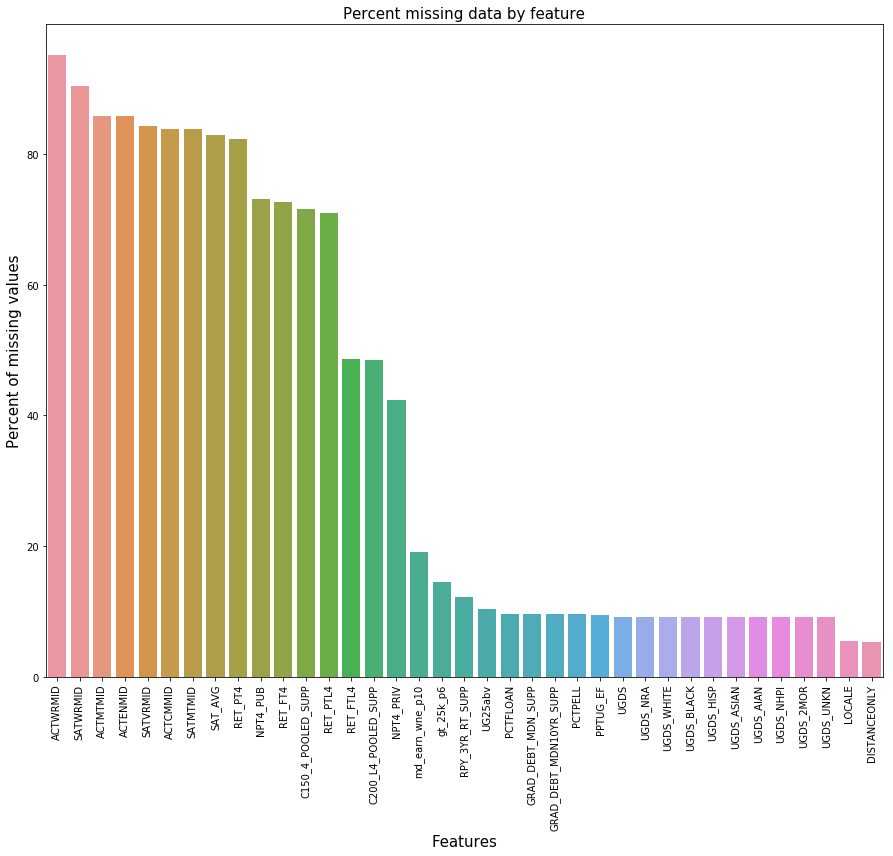

In [4]:
project.null_summary(project.train_data)

In [5]:
df = project.train_data
df = df.drop(df.columns[0],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 42 columns):
INSTNM                    658 non-null object
CITY                      658 non-null object
STABBR                    658 non-null object
PREDDEG                   658 non-null int64
CONTROL                   658 non-null int64
LOCALE                    622 non-null float64
SATVRMID                  103 non-null float64
SATMTMID                  106 non-null float64
SATWRMID                  63 non-null float64
ACTCMMID                  106 non-null float64
ACTENMID                  93 non-null float64
ACTMTMID                  93 non-null float64
ACTWRMID                  32 non-null float64
SAT_AVG                   112 non-null float64
DISTANCEONLY              623 non-null float64
UGDS                      598 non-null float64
UGDS_WHITE                598 non-null float64
UGDS_BLACK                598 non-null float64
UGDS_HISP                 598 non-null float64
UGDS_ASIAN   

In [6]:
##Preliminary Feature Processing###########
#Categorical Variables
#City is represetned by locale and for now we drop them
#Names could be of type academy, instituion,college, universiy, others 
df = df.drop(['CITY'],axis=1)
df['INSTNM'] = df['INSTNM'].apply(lambda x:project.encode_organization(x))
df['STABBR'] = df['STABBR'].apply(lambda x:project.encode_state(x))
df = df.apply(lambda x: x.replace('PrivacySuppressed',np.NAN))

In [7]:
df.columns

Index(['INSTNM', 'STABBR', 'PREDDEG', 'CONTROL', 'LOCALE', 'SATVRMID',
       'SATMTMID', 'SATWRMID', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID',
       'SAT_AVG', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK',
       'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR',
       'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'NPT4_PUB', 'NPT4_PRIV', 'PCTPELL',
       'RET_FT4', 'RET_FTL4', 'RET_PT4', 'RET_PTL4', 'PCTFLOAN', 'UG25abv',
       'GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP',
       'C150_4_POOLED_SUPP', 'C200_L4_POOLED_SUPP', 'md_earn_wne_p10',
       'gt_25k_p6'],
      dtype='object')

In [11]:
#mean, variance, skewness, and kurtosis
for column in df.columns:
    if column == 'INSTNM' or column == 'STABBR':
        next 
    else:
        print (column)
        project.get_stats(df, column)
        print ("")

PREDDEG
Skewness: 0.333063
Kurtosis: -0.886214
Mean: 1.741641
Variance: 1.065569

CONTROL
Skewness: -0.375775
Kurtosis: -1.550128
Mean: 2.189970
Variance: 0.741634

LOCALE
Skewness: 1.026351
Kurtosis: -0.016521
Mean: 19.569132
Variance: 90.319690

SATVRMID
Skewness: 0.465492
Kurtosis: 0.353141
Mean: 517.339806
Variance: 3722.187322

SATMTMID
Skewness: 0.732312
Kurtosis: 1.016755
Mean: 527.415094
Variance: 4112.340341

SATWRMID
Skewness: 0.376193
Kurtosis: 0.079815
Mean: 522.793651
Variance: 4765.456733

ACTCMMID
Skewness: 0.504270
Kurtosis: 0.234173
Mean: 22.962264
Variance: 9.331896

ACTENMID
Skewness: 0.389004
Kurtosis: -0.162917
Mean: 22.849462
Variance: 12.803179

ACTMTMID
Skewness: 0.760314
Kurtosis: 1.018322
Mean: 22.655914
Variance: 9.271622

ACTWRMID
Skewness: 1.099018
Kurtosis: 1.826835
Mean: 7.937500
Variance: 0.899194

SAT_AVG
Skewness: 0.618825
Kurtosis: 0.654907
Mean: 1049.633929
Variance: 13929.297217

DISTANCEONLY
Skewness: 14.340897
Kurtosis: 204.317225
Mean: 0.004815
V

TypeError: must be str, not int

In [256]:
## process Data using median
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

Skewness: 0.070538
Kurtosis: -0.501341
Mean: 0.596309
Variance: 0.034197


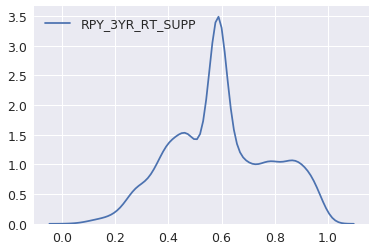

In [257]:
##(e)
#Continuous target variable: 
#1.md_earn_wne_p10.
#The variable represents median earnings of students working and not enrolled 10 years after entry
#It reflects the economic well being of a school's graduates 10 years after graduation, given the assumption that college education is an important 
#factor for student's long temr monetary success, the variable justifies the quality of education from this perspective. 
#2.gt_25k_p6
#This variable represents the percentage of student eanring above 25k usd after 6 years of graduation, similar to the previous variable
#it measure the monetary success of student after college.
df = df.dropna(subset=['RPY_3YR_RT_SUPP'])
df['RPY_3YR_RT_SUPP'] = pd.to_numeric(df['RPY_3YR_RT_SUPP'])
project.get_stats(df,'RPY_3YR_RT_SUPP')
sns.kdeplot(df['RPY_3YR_RT_SUPP'])

ACTENMID           0.248855
CONTROL           -0.392382
PCTPELL           -0.539093
PREDDEG            0.405254
RET_FT4            0.279314
RPY_3YR_RT_SUPP    1.000000
SAT_AVG            0.255830
UG25abv           -0.457358
UGDS_BLACK        -0.405246
UGDS_HISP         -0.127475
UGDS_WHITE         0.372659
Name: RPY_3YR_RT_SUPP, dtype: float64


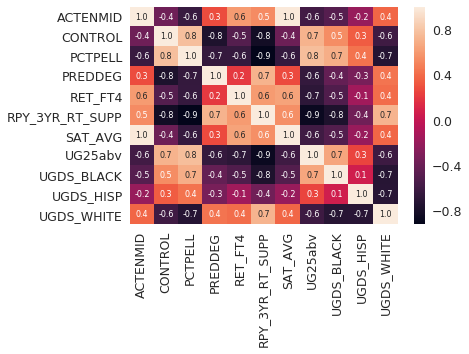

In [258]:
columns = project.correlation_map(df,'RPY_3YR_RT_SUPP',5)

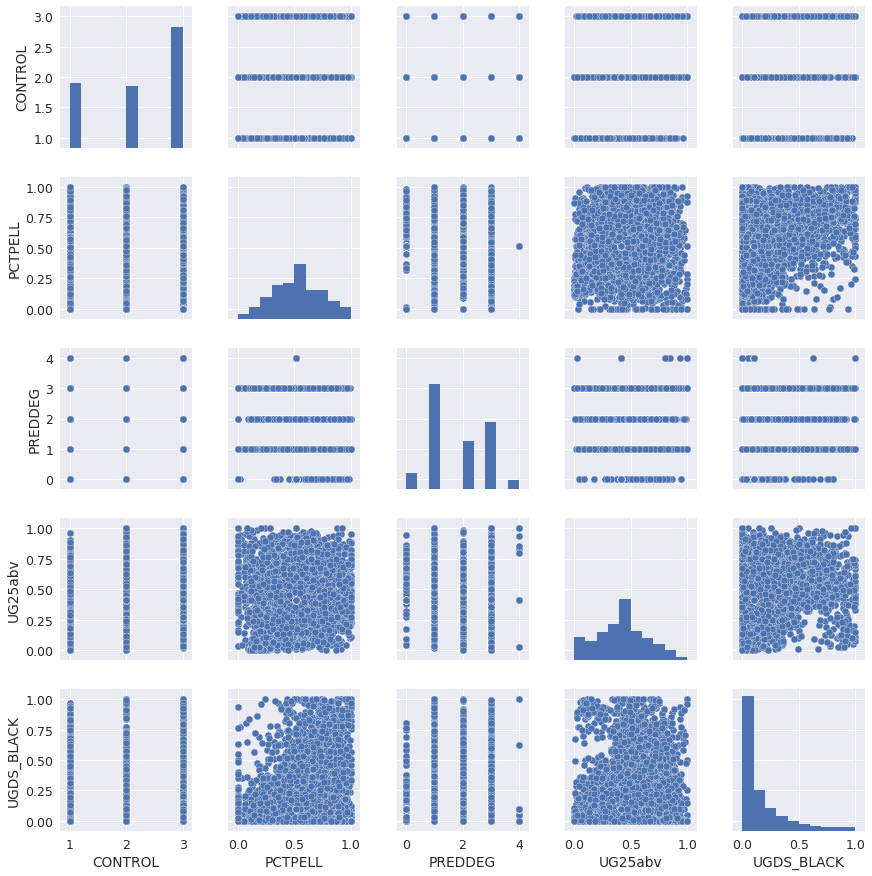

In [262]:
selected_cols = ['CONTROL', 'PCTPELL', 'PREDDEG','UG25abv', 'UGDS_BLACK']
sns.pairplot(df[selected_cols])
plt.show()